[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [16]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\petpulslab\AppData\Local\Temp\ipykernel_10052\2960125416.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\petpulslab\AppData\Local\Temp\ipykernel_10052\2960125416.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

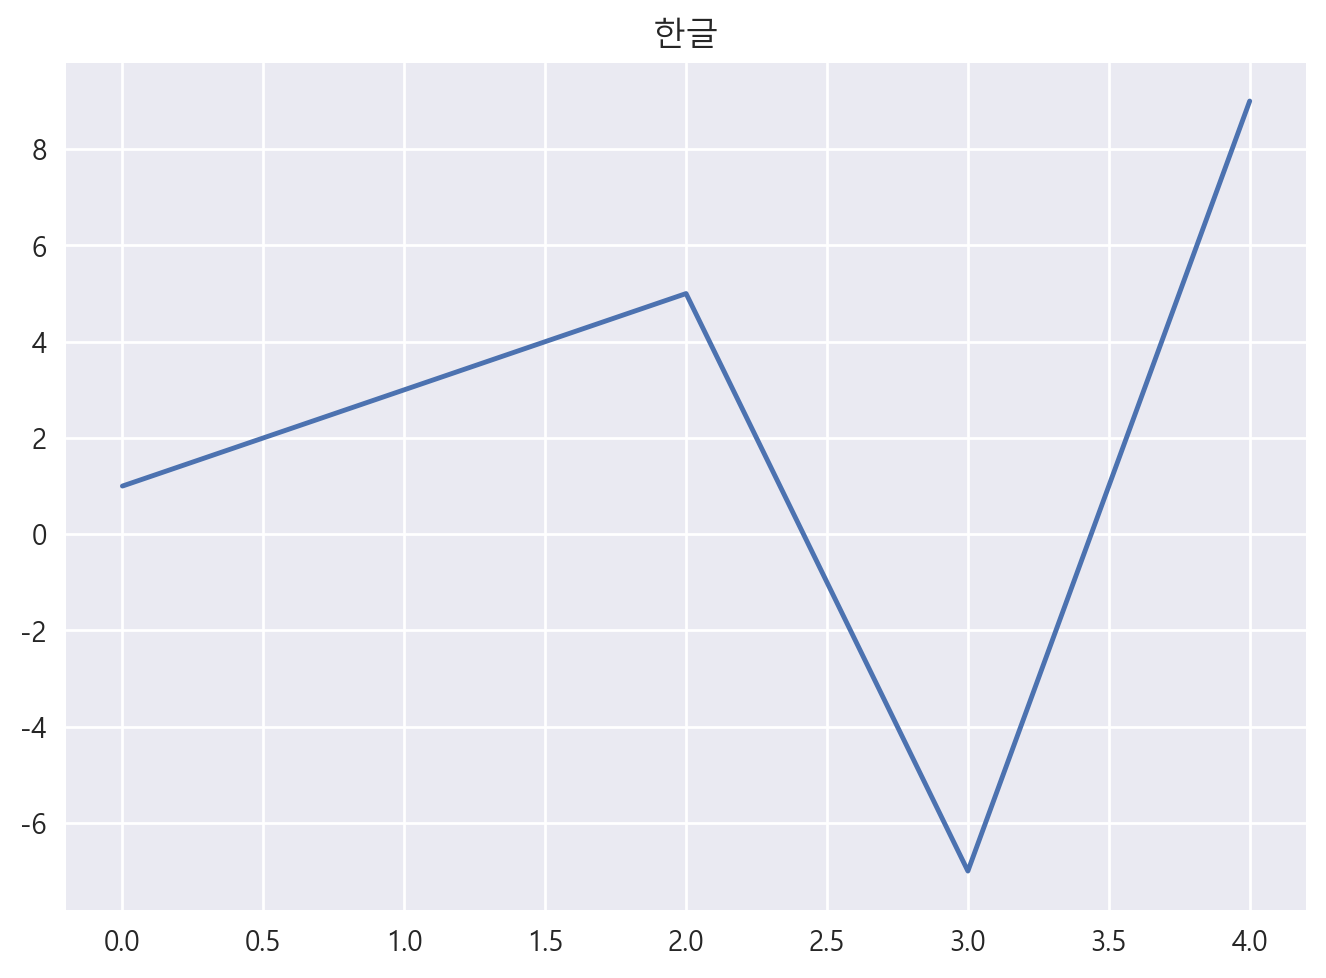

In [17]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title = '한글')

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [47]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"
# 디스플레이장비및부품
url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=269"

In [48]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [49]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
# 3개의 row, 3개의 column이 제거되었습니다.
raw = raw.dropna(how="all").dropna(axis=1, how="all")
print(raw.shape)

(93, 12)
(90, 9)


## 파생변수 만들기

In [50]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%y-%m-%d")
today

'23-08-16'

In [51]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [52]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,인지디스플레 *,3345.0,770.0,+29.90%,3345.0,0.0,16512414.0,51347.0,5558951.0,23-08-16
2,테크엔,232.0,30.0,+14.85%,232.0,0.0,61.0,14.0,0.0,23-08-16
3,엘에이티,6640.0,850.0,+14.68%,5310.0,5800.0,1.0,6.0,1.0,23-08-16
4,엘리비젼,596.0,57.0,+10.58%,459.0,595.0,825.0,454.0,101.0,23-08-16
5,프로이천 *,3985.0,305.0,+8.29%,3955.0,3975.0,6765101.0,27220.0,2083570.0,23-08-16
...,...,...,...,...,...,...,...,...,...,...
86,풍원정밀 *,8740.0,430.0,-4.69%,8730.0,8770.0,39446.0,347.0,39582.0,23-08-16
87,영우디에스피 *,1035.0,52.0,-4.78%,1035.0,1041.0,107106.0,112.0,56357.0,23-08-16
88,티로보틱스 *,31800.0,1650.0,-4.93%,31500.0,31550.0,1365852.0,42733.0,6385911.0,23-08-16
89,베셀 *,4465.0,235.0,-5.00%,4450.0,4470.0,193608.0,870.0,411286.0,23-08-16


## 거래량과 거래대금 시각화

<Axes: ylabel='종목명'>

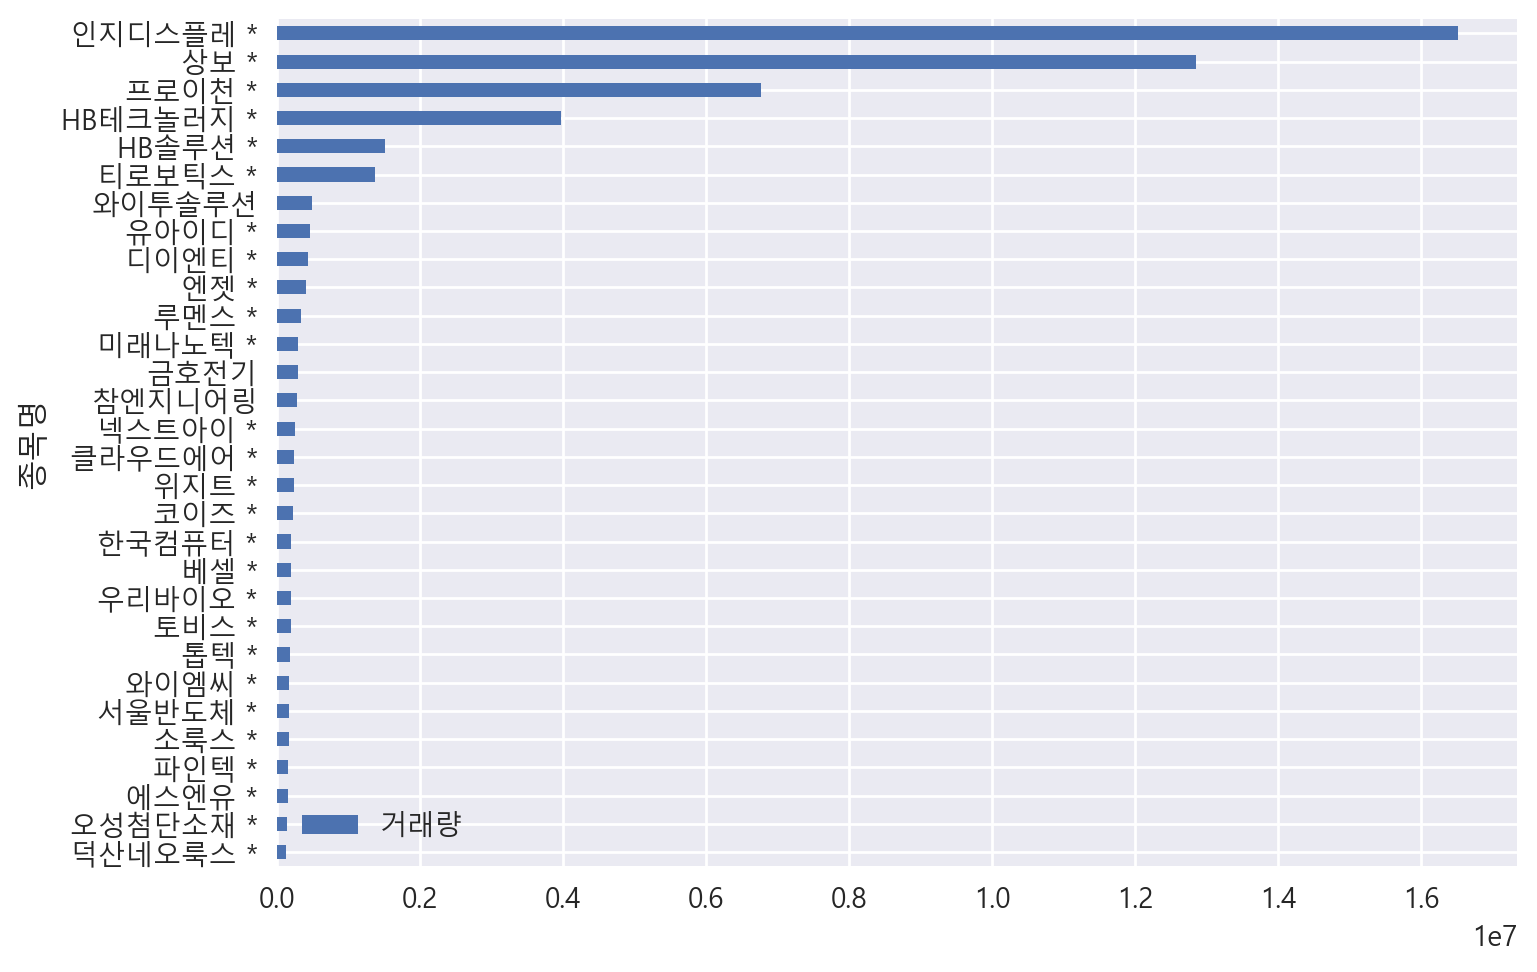

In [56]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[['종목명','거래량']].sort_values("거래량")
temp.set_index('종목명').tail(30).plot.barh()

<Axes: ylabel='종목명'>

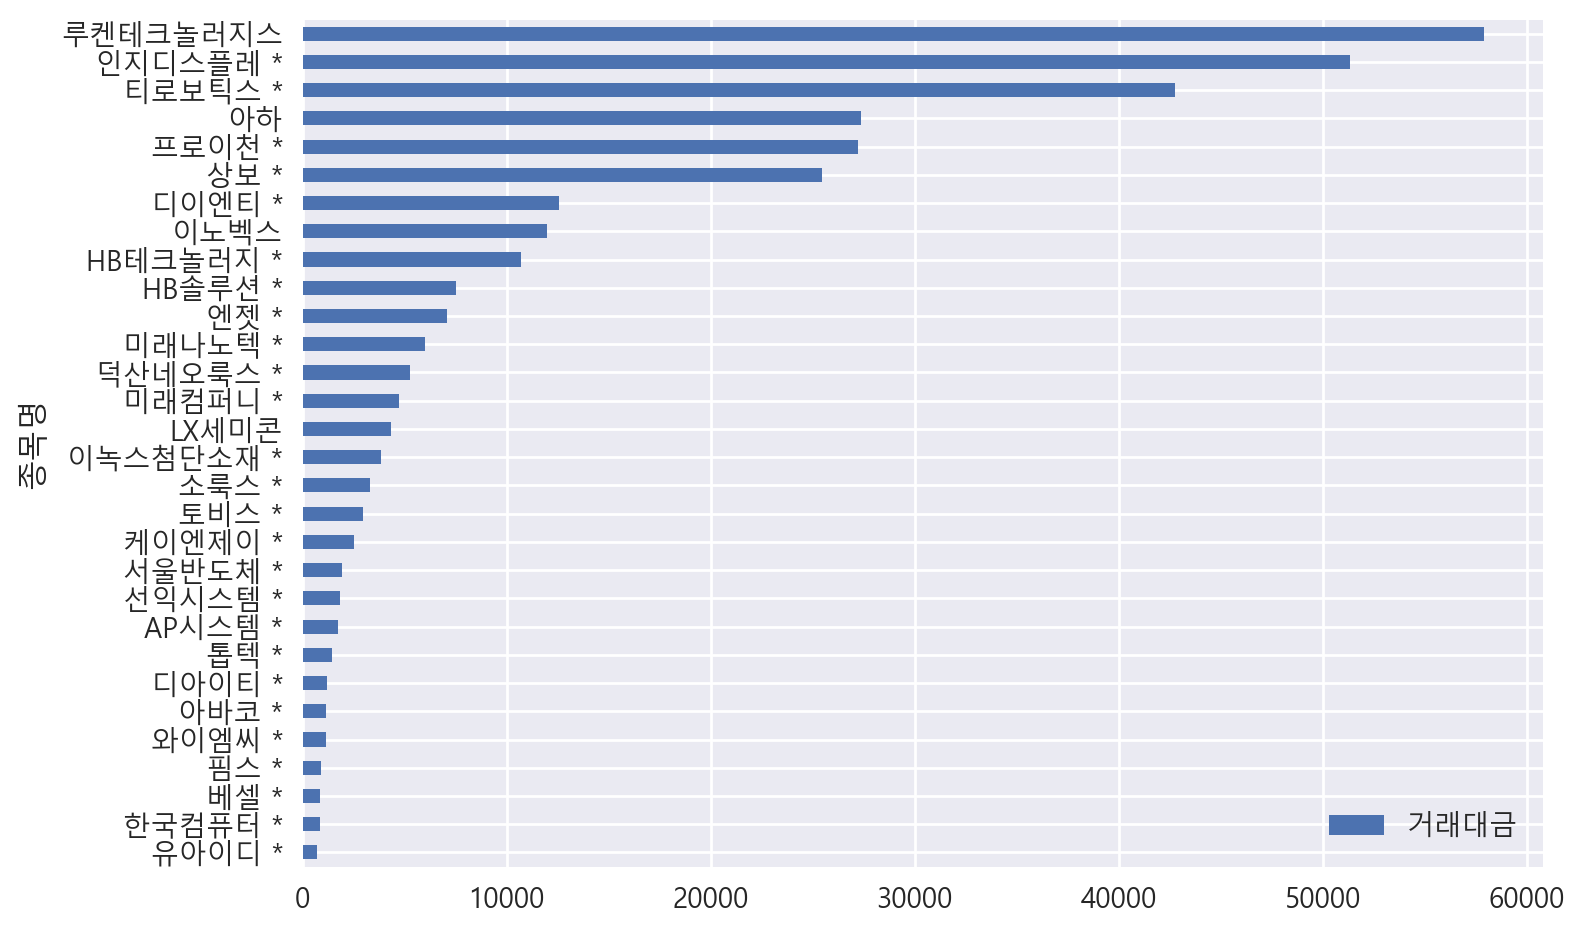

In [58]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[['종목명','거래대금']].sort_values("거래대금")
temp.set_index('종목명').tail(30).plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [69]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw['종목명'].str.replace("*","",regex=True)
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

In [70]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[['종목명','종목명_전처리']].head()

,종목명,종목명_전처리
1,인지디스플레 *,인지디스플레
2,테크엔,테크엔
3,엘에이티,엘에이티
4,엘리비젼,엘리비젼
5,프로이천 *,프로이천


In [71]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,66700,2,-600,-0.89,66700,67100,66300,7771562,518249494400,398184496085000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,531000,2,-11000,-2.03,533000,540000,530000,140621,74986769000,124254000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,116700,1,1800,1.57,117200,118500,115000,2342014,273785445000,84957875995500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,784000,2,-10000,-1.26,789000,790000,776000,24599,19185918000,55800416000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,557000,2,-20000,-3.47,570000,572000,555000,748774,421980430000,47106175110000,84571230,STK


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [76]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[['Code','Name']]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005490,POSCO홀딩스


In [77]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(90, 11)

In [87]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df = raw.merge(df_item_code_name, right_on='종목명_전처리', left_on='종목명_전처리')
df = raw.merge(df_item_code_name, on='종목명_전처리', how = 'left') 
df.shape

(90, 12)

In [88]:
# 병합이 잘 되었는지 확인합니다.
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,인지디스플레 *,3345.0,770.0,+29.90%,3345.0,0.0,16512414.0,51347.0,5558951.0,23-08-16,인지디스플레,037330
1,테크엔,232.0,30.0,+14.85%,232.0,0.0,61.0,14.0,0.0,23-08-16,테크엔,308700
2,엘에이티,6640.0,850.0,+14.68%,5310.0,5800.0,1.0,6.0,1.0,23-08-16,엘에이티,311060
3,엘리비젼,596.0,57.0,+10.58%,459.0,595.0,825.0,454.0,101.0,23-08-16,엘리비젼,276240
4,프로이천 *,3985.0,305.0,+8.29%,3955.0,3975.0,6765101.0,27220.0,2083570.0,23-08-16,프로이천,321260
...,...,...,...,...,...,...,...,...,...,...,...,...
85,풍원정밀 *,8740.0,430.0,-4.69%,8730.0,8770.0,39446.0,347.0,39582.0,23-08-16,풍원정밀,371950
86,영우디에스피 *,1035.0,52.0,-4.78%,1035.0,1041.0,107106.0,112.0,56357.0,23-08-16,영우디에스피,143540
87,티로보틱스 *,31800.0,1650.0,-4.93%,31500.0,31550.0,1365852.0,42733.0,6385911.0,23-08-16,티로보틱스,117730
88,베셀 *,4465.0,235.0,-5.00%,4450.0,4470.0,193608.0,870.0,411286.0,23-08-16,베셀,177350


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [ ]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [ ]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url


In [ ]:
# read_html을 이용해 데이터를 수집합니다.
tables

In [ ]:
# 제대로 수집이 되었는지 확인합니다.


In [ ]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [ ]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
# item_info = []

In [ ]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
# finance_info

In [ ]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.


In [ ]:
# 위에서 만든 리스트의 값을 확인합니다.


## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [ ]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.


In [ ]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
# df_item

## transpose를 통해 행과 열의 위치를 변경

In [ ]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.


## 개별 주가 정보를 수집하는 함수를 생성

In [ ]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
# import time

# def get_item_info(item_code):

In [ ]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [ ]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
# from tqdm.auto import tqdm
# tqdm.pandas()

In [ ]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
# result

In [ ]:
result

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [ ]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
# df_item_info

In [ ]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
# df_info

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.


## 파일명 만들기

In [ ]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

In [ ]:
# csv 파일로 저장합니다.


In [ ]:
# 제대로 저장되었는지 확인합니다.
